In [439]:
from time import time
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [440]:
df2 = pd.read_csv("datasets/text_emotion.csv")

In [441]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [442]:
print("Dimension :", df2.shape, "\n-----------")
print("\nDatas format :\n--------------\n", df2.dtypes)
print("\n# of empty cells :\n------------------\n", df2.isnull().sum())
print("\nValues of the sentiment column :\n--------------------------------\n", df2.sentiment.unique())

Dimension : (40000, 4) 
-----------

Datas format :
--------------
 tweet_id      int64
sentiment    object
author       object
content      object
dtype: object

# of empty cells :
------------------
 tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

Values of the sentiment column :
--------------------------------
 ['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


In [443]:
df_author = df2.groupby(['sentiment']).size().sort_values()
print("\nSentiment's word frequency in the df2 :\n---------------------------------------\n", df_author)


Sentiment's word frequency in the df2 :
---------------------------------------
 sentiment
anger          110
boredom        179
enthusiasm     759
empty          827
hate          1323
relief        1526
fun           1776
surprise      2187
love          3842
sadness       5165
happiness     5209
worry         8459
neutral       8638
dtype: int64


In [444]:
df2 = df2.drop(['tweet_id', 'author'], axis = 1)
df2.shape

(40000, 2)

In [445]:
print("----------------------------")
print("First lines of the dataframe")
print("----------------------------")
df2.head()

----------------------------
First lines of the dataframe
----------------------------


,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [446]:
df2.rename(columns={"content": "sentence", "sentiment": "label"}, inplace=True)
df2.head()

,label,sentence
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [447]:
from sklearn.model_selection import train_test_split

y = df2["label"].values
sentences = df2["sentence"].values

sentences_train, sentences_test, y_train, y_test = train_test_split(
   sentences, y, test_size=0.25, random_state=1000)

In [448]:
df2["sentence"].shape

(40000,)

In [449]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

vectorizer = CountVectorizer(strip_accents='ascii', lowercase=True, stop_words='english', ngram_range=(1,1))
#vectorizer.fit(sentences)

#vectorizer = TfidfVectorizer(stop_words='english', strip_accents='ascii', lowercase=True)

X = vectorizer.fit_transform(sentences)
y  = le.fit_transform(df2["label"].values)


X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=1000)
X_train

# To avoid error 
X_test= X_test.sorted_indices()
X_train= X_train.sorted_indices()

In [450]:

from sklearn.linear_model import SGDClassifier, LogisticRegression

classifier = SGDClassifier()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", 100*score, "%")

Accuracy: 32.0 %


In [451]:
X_train.shape

(30000, 47912)

In [452]:
X_train[:10]

<10x47912 sparse matrix of type '<class 'numpy.int64'>'
	with 73 stored elements in Compressed Sparse Row format>

In [453]:
#from keras.models import Sequentialw
from tensorflow import keras
from keras import layers, Sequential

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
#model.add(layers.Dense(units = 100, activation = 'linear', input_dim=input_dim))
model.add(layers.Dense(16, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
#model.add(layers.Dropout(.5))
#model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(14, activation='softmax'))

In [454]:
model.compile(loss='SparseCategoricalCrossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                766608    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_2 (Dense)              (None, 14)                910       
Total params: 768,606
Trainable params: 768,606
Non-trainable params: 0
_________________________________________________________________


* ngram (1,1), epoch=15, batch_size=128 
Epoch 4/15
235/235 [==============================] - 26s 108ms/step - loss: 1.5010 - accuracy: 0.5117 - val_loss: 1.8953 - val_accuracy: 0.3591

* ngram (2,2), epoch=15, batch_size=128 
Epoch 3/15
235/235 [==============================] - 76s 322ms/step - loss: 1.4288 - accuracy: 0.5622 - val_loss: 2.0427 - val_accuracy: 0.3099

* ngram_range (1,2), epoch=15, batch_size=128 
Epoch 3/15
235/235 [==============================] - 80s 341ms/step - loss: 1.3421 - accuracy: 0.5792 - val_loss: 1.9095 - val_accuracy: 0.3569

* w/o ngram_range epoch=15, batch_size=128 
Epoch 5/10
235/235 [==============================] - 15s 64ms/step - loss: 1.4175 - accuracy: 0.5314 - val_loss: 1.9055 - val_accuracy: 0.3637

* Epoch 3/10 epoch=15, batch_size=128 
vectorizer = CountVectorizer(strip_accents='ascii', lowercase=True, stop_words='english')
235/235 [==============================] - 18s 74ms/step - loss: 1.7056 - accuracy: 0.4361 - val_loss: 1.8982 - val_accuracy: 0.3600

* Epoch 3/10 epoch=15, batch_size=128 
235/235 [==============================] - 65s 277ms/step - loss: 1.3419 - accuracy: 0.5846 - val_loss: 1.9235 - val_accuracy: 0.3543

* Epoch 6/10 batch_size=1024
model = Sequential()
#model.add(layers.Dense(units = 100, activation = 'linear', input_dim=input_dim))
model.add(layers.Dense(16, input_dim=input_dim, activation='relu'))
#model.add(layers.Dropout(.8))
model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(.8))
#model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(14, activation='softmax'))

30/30 [==============================] - 3s 89ms/step - loss: 1.4640 - accuracy: 0.5403 - val_loss: 1.9921 - val_accuracy: 0.3384


In [455]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=1024)

from keras.backend import clear_session
clear_session()

Epoch 1/10
30/30 [==============================] - 3s 47ms/step - loss: 2.6113 - accuracy: 0.1675 - val_loss: 2.4610 - val_accuracy: 0.2102
Epoch 2/10
30/30 [==============================] - 1s 34ms/step - loss: 2.3702 - accuracy: 0.2118 - val_loss: 2.2062 - val_accuracy: 0.2102
Epoch 3/10
30/30 [==============================] - 1s 33ms/step - loss: 2.1392 - accuracy: 0.2503 - val_loss: 2.1006 - val_accuracy: 0.3003
Epoch 4/10
30/30 [==============================] - 1s 34ms/step - loss: 1.9760 - accuracy: 0.3726 - val_loss: 2.0197 - val_accuracy: 0.3342
Epoch 5/10
30/30 [==============================] - 1s 32ms/step - loss: 1.8125 - accuracy: 0.4326 - val_loss: 1.9748 - val_accuracy: 0.3376
Epoch 6/10
30/30 [==============================] - 1s 35ms/step - loss: 1.6568 - accuracy: 0.4831 - val_loss: 1.9612 - val_accuracy: 0.3496
Epoch 7/10
30/30 [==============================] - 1s 33ms/step - loss: 1.4934 - accuracy: 0.5341 - val_loss: 1.9743 - val_accuracy: 0.3471
Epoch 8/10
30

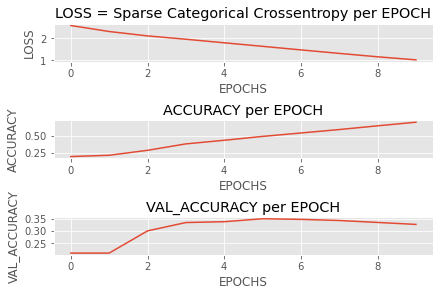

In [456]:
import matplotlib.pyplot as plt

# Create two subplots and unpack the output array immediately
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, constrained_layout=True)

# Add a title to the axes
ax1.set_title('LOSS = Sparse Categorical Crossentropy per EPOCH')
ax2.set_title('ACCURACY per EPOCH')
ax3.set_title('VAL_ACCURACY per EPOCH')

# Add an x-label to the axes
ax1.set_xlabel('EPOCHS')
ax2.set_xlabel('EPOCHS')
ax3.set_xlabel('EPOCHS')

# Add a y-label to the axes
ax1.set_ylabel('LOSS')
ax2.set_ylabel('ACCURACY')
ax3.set_ylabel('VAL_ACCURACY')


# Plot results
ax1.plot(history.history['loss'])
ax2.plot(history.history['accuracy'])
ax3.plot(history.history['val_accuracy'])

# Add a grid
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

plt.show()

In [457]:
### from keras.models import Sequentialw
from tensorflow import keras
from keras import layers, Sequential

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
#model.add(layers.Dense(units = 100, activation = 'linear', input_dim=input_dim))
model.add(layers.Dense(16, input_dim=input_dim, activation='relu'))
#model.add(layers.Dropout(.5))
model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(.5))
#model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(14, activation='softmax'))

In [458]:
model.compile(loss='SparseCategoricalCrossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                766608    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1088      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                910       
Total params: 768,606
Trainable params: 768,606
Non-trainable params: 0
_________________________________________________________________


* ngram (1,1), epoch=15, batch_size=128 
Epoch 4/15
235/235 [==============================] - 26s 108ms/step - loss: 1.5010 - accuracy: 0.5117 - val_loss: 1.8953 - val_accuracy: 0.3591

* ngram (2,2), epoch=15, batch_size=128 
Epoch 3/15
235/235 [==============================] - 76s 322ms/step - loss: 1.4288 - accuracy: 0.5622 - val_loss: 2.0427 - val_accuracy: 0.3099

* ngram_range (1,2), epoch=15, batch_size=128 
Epoch 3/15
235/235 [==============================] - 80s 341ms/step - loss: 1.3421 - accuracy: 0.5792 - val_loss: 1.9095 - val_accuracy: 0.3569

* w/o ngram_range epoch=15, batch_size=128 
Epoch 5/10
235/235 [==============================] - 15s 64ms/step - loss: 1.4175 - accuracy: 0.5314 - val_loss: 1.9055 - val_accuracy: 0.3637

* Epoch 3/10 epoch=15, batch_size=128 
vectorizer = CountVectorizer(strip_accents='ascii', lowercase=True, stop_words='english')
235/235 [==============================] - 18s 74ms/step - loss: 1.7056 - accuracy: 0.4361 - val_loss: 1.8982 - val_accuracy: 0.3600

* Epoch 3/10 epoch=15, batch_size=128 
235/235 [==============================] - 65s 277ms/step - loss: 1.3419 - accuracy: 0.5846 - val_loss: 1.9235 - val_accuracy: 0.3543

* Epoch 6/10 batch_size=1024
model = Sequential()
#model.add(layers.Dense(units = 100, activation = 'linear', input_dim=input_dim))
model.add(layers.Dense(16, input_dim=input_dim, activation='relu'))
#model.add(layers.Dropout(.8))
model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(.8))
#model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(14, activation='softmax'))

30/30 [==============================] - 3s 89ms/step - loss: 1.4640 - accuracy: 0.5403 - val_loss: 1.9921 - val_accuracy: 0.3384


In [459]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=1024)

from keras.backend import clear_session
clear_session()

Epoch 1/10
30/30 [==============================] - 2s 47ms/step - loss: 2.6220 - accuracy: 0.1606 - val_loss: 2.5272 - val_accuracy: 0.2125
Epoch 2/10
30/30 [==============================] - 1s 36ms/step - loss: 2.4545 - accuracy: 0.2239 - val_loss: 2.2418 - val_accuracy: 0.2102
Epoch 3/10
30/30 [==============================] - 1s 28ms/step - loss: 2.1989 - accuracy: 0.2344 - val_loss: 2.1265 - val_accuracy: 0.2954
Epoch 4/10
30/30 [==============================] - 1s 34ms/step - loss: 2.0585 - accuracy: 0.2912 - val_loss: 2.0446 - val_accuracy: 0.3182
Epoch 5/10
30/30 [==============================] - 1s 37ms/step - loss: 1.9080 - accuracy: 0.3611 - val_loss: 1.9858 - val_accuracy: 0.3415
Epoch 6/10
30/30 [==============================] - 1s 33ms/step - loss: 1.7540 - accuracy: 0.4287 - val_loss: 1.9586 - val_accuracy: 0.3494
Epoch 7/10
30/30 [==============================] - 1s 36ms/step - loss: 1.5790 - accuracy: 0.5023 - val_loss: 1.9562 - val_accuracy: 0.3495
Epoch 8/10
30

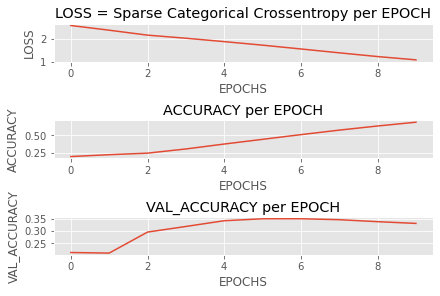

In [460]:
import matplotlib.pyplot as plt

# Create two subplots and unpack the output array immediately
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, constrained_layout=True)

# Add a title to the axes
ax1.set_title('LOSS = Sparse Categorical Crossentropy per EPOCH')
ax2.set_title('ACCURACY per EPOCH')
ax3.set_title('VAL_ACCURACY per EPOCH')

# Add an x-label to the axes
ax1.set_xlabel('EPOCHS')
ax2.set_xlabel('EPOCHS')
ax3.set_xlabel('EPOCHS')

# Add a y-label to the axes
ax1.set_ylabel('LOSS')
ax2.set_ylabel('ACCURACY')
ax3.set_ylabel('VAL_ACCURACY')


# Plot results
ax1.plot(history.history['loss'])
ax2.plot(history.history['accuracy'])
ax3.plot(history.history['val_accuracy'])

# Add a grid
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

plt.show()

Epoch 1/10
4/4 [==============================] - 1s 137ms/step - loss: 0.9639 - accuracy: 0.7282 - val_loss: 2.0954 - val_accuracy: 0.3300
Epoch 2/10
4/4 [==============================] - 1s 120ms/step - loss: 0.9480 - accuracy: 0.7336 - val_loss: 2.1060 - val_accuracy: 0.3304
Epoch 3/10
4/4 [==============================] - 0s 109ms/step - loss: 0.9299 - accuracy: 0.7361 - val_loss: 2.1176 - val_accuracy: 0.3295
Epoch 4/10
4/4 [==============================] - 0s 103ms/step - loss: 0.9123 - accuracy: 0.7430 - val_loss: 2.1288 - val_accuracy: 0.3288
Epoch 5/10
4/4 [==============================] - 0s 112ms/step - loss: 0.8943 - accuracy: 0.7460 - val_loss: 2.1390 - val_accuracy: 0.3283
Epoch 6/10
4/4 [==============================] - 0s 105ms/step - loss: 0.8756 - accuracy: 0.7545 - val_loss: 2.1485 - val_accuracy: 0.3278
Epoch 7/10
4/4 [==============================] - 0s 116ms/step - loss: 0.8605 - accuracy: 0.7579 - val_loss: 2.1588 - val_accuracy: 0.3260
Epoch 8/10
4/4 [====

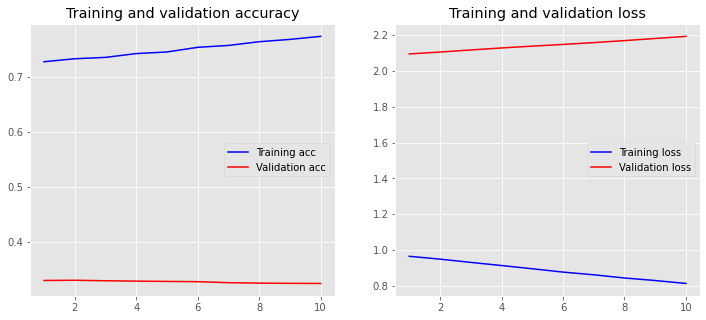

In [461]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=8192)

from keras.backend import clear_session
clear_session()

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

* Word Embedding

Quelle doit être le format de donnée en entrée de la couche "Embedding" ?

Des listes de liste contenant des nombres correspondant aux mots de la phrase

Expliquer ce que fait et le rôle de la fonction pad_sequence ? 

Transformer en des documens de meme taille

Quelle sont les paramètres importants de cette fonction ?

maxlen devient input_dim
padding completer la taille des phrases < maxlen avece des zéros avant ou après les mots de la phrase

Expliquer ce que fait et le rôle de la couche GlobalMaxPool1d ?

réduction de dimension des vecteurs d'entrée en prenant la val max sur la dimension temporelle

Quelle sont les paramètres importants ? Quelle alternatives existe il ?

Flatten est une alternative possible, reshape


Faire le f1_score pour chaque classe du text_emotion


In [899]:
X_train.shape[1]

47912

In [1010]:
### from keras.models import Sequentialw
from tensorflow import keras
from keras import layers, Sequential

from keras.preprocessing.text import Tokenizer

embedding_dim = 50
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train_1 = tokenizer.texts_to_sequences(sentences_train)
X_test_1 = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train_1, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test_1, padding='post', maxlen=maxlen)

#print(X_train[0, :])

input_dim = X_train.shape[1]  # Number of features

from keras.backend import clear_session
clear_session()

model_NN = Sequential()
model_NN.add(layers.Embedding(input_dim=vocab_size, 
                               output_dim=embedding_dim, 
                               input_length=maxlen))
model_NN.add(layers.GlobalMaxPool1D())
#model.add(layers.Dense(units = 100, activation = 'linear', input_dim=input_dim))
#model.add(layers.Conv1D(16, 5, activation='relu'))
#model.add(layers.GlobalMaxPooling1D())
#model.add(layers.Dense(128, input_dim=input_dim, activation='relu'))
#model.add(layers.Dropout(.1))

model_NN.add(layers.Dense(10, input_dim=input_dim, activation='relu'))

#model.add(layers.Dropout(.2))
#model.add(layers.Dense(26, input_dim=input_dim, activation='relu'))
model_NN.add(layers.Dense(13, activation='softmax'))

In [1011]:
model_NN.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model_NN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           2000550   
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 13)                143       
Total params: 2,001,203
Trainable params: 2,001,203
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
118/118 [==============================] - 7s 52ms/step - loss: 2.4710 - accuracy: 0.1536 - val_loss: 2.2109 - val_accuracy: 0.2146
Epoch 2/10
118/118 [==============================] - 5s 45ms/step - loss: 2.1677 - accuracy: 0.2296 - val_loss: 2.0846 - val_accuracy: 0.2846
Epoch 3/10
118/118 [==============================] - 5s 43ms/step - loss: 2.0323 - accuracy: 0.3222 - val_loss: 2.0162 - val_accuracy: 0.3233
Epoch 4/10
118/118 [==============================] - 5s 43ms/step - loss: 1.9496 - accuracy: 0.3510 - val_loss: 1.9696 - val_accuracy: 0.3339
Epoch 5/10
118/118 [==============================] - 5s 45ms/step - loss: 1.8703 - accuracy: 0.3686 - val_loss: 1.9396 - val_accuracy: 0.3385
Epoch 6/10
118/118 [==============================] - 6s 47ms/step - loss: 1.8178 - accuracy: 0.3859 - val_loss: 1.9270 - val_accuracy: 0.3409
Epoch 7/10
118/118 [==============================] - 6s 47ms/step - loss: 1.7501 - accuracy: 0.4112 - val_loss: 1.9241 - val_accuracy: 0.3419

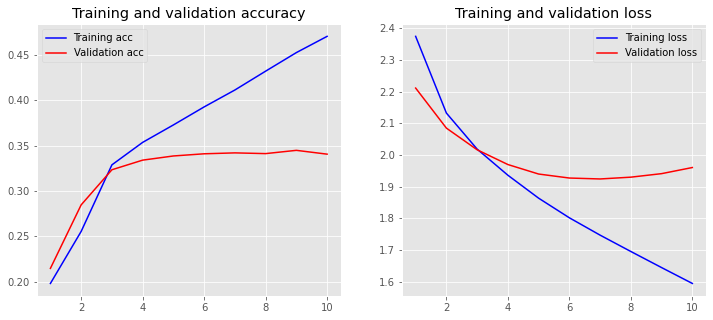

In [1012]:
history = model_NN.fit(X_train, y_train,
                       epochs=10,
                       verbose=True,
                       validation_data=(X_test, y_test),
                       batch_size=256)

loss, accuracy = model_NN.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_NN.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [1013]:
from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred, target_names=target_names))

In [1014]:
y_pred = model_NN.predict(X_test, verbose=1)

313/313 [==============================] - 1s 4ms/step


In [1015]:
X_test.shape

(10000, 100)

In [1016]:
print(y_pred)

[[0.00067083 0.00157261 0.00966945 ... 0.21040125 0.02118632 0.31914243]
 [0.00267203 0.00321891 0.02312646 ... 0.06035089 0.10670493 0.24752761]
 [0.00059837 0.00230166 0.01138198 ... 0.01042188 0.02464274 0.00753237]
 ...
 [0.00225357 0.00267658 0.01993347 ... 0.05791739 0.1023447  0.2828431 ]
 [0.003761   0.00567541 0.02809221 ... 0.08854594 0.05316925 0.22137918]
 [0.00171289 0.00180625 0.00965732 ... 0.13291638 0.03209105 0.5087993 ]]


In [1017]:
labels = np.unique(df2['label'].values)
labels

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [1018]:
print(classification_report(y_test, y_pred.argmax(1), target_names=labels, zero_division=0))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        27
     boredom       0.00      0.00      0.00        44
       empty       0.00      0.00      0.00       203
  enthusiasm       0.00      0.00      0.00       202
         fun       0.00      0.00      0.00       450
   happiness       0.30      0.47      0.37      1290
        hate       0.47      0.13      0.20       340
        love       0.41      0.38      0.39       949
     neutral       0.37      0.51      0.43      2166
      relief       0.00      0.00      0.00       382
     sadness       0.34      0.21      0.26      1296
    surprise       0.27      0.01      0.01       549
       worry       0.32      0.49      0.38      2102

    accuracy                           0.34     10000
   macro avg       0.19      0.17      0.16     10000
weighted avg       0.30      0.34      0.30     10000



In [1019]:
def emotion_prediction(text, model):
    corpus_self = tokenizer.texts_to_sequences([text])
    corpus_pad = pad_sequences(corpus_self, padding='post', maxlen=maxlen)
    prediction_1 = model.predict(corpus_pad, batch_size=64, verbose=1)
    max_d = np.argmax(prediction_1)
    emotion_final = le.inverse_transform([max_d])
    print(emotion_final)
  #return emotion_final

In [ ]:
phrase = input()

emotion_prediction(phrase, model_NN)